<a href="https://colab.research.google.com/github/Vak-kas/data_analysis/blob/main/unit4/unit4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# unit 4
기온 데이터를 다양하게 시각화 하기

In [2]:
#구글 드라이브 건들도록 허용
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [1]:
# 폴더 위치 설정 (폴더 위치에 맞춰서 변경할 것)
import os
colab_path = "/gdrive/My Drive/data"  # 경로예시: 구글드라이브/내 드라이브/data

# 기온 데이터를 상자 그림으로 표현하기


boxplot 사용해보기
- 상자그림(boxplot) : 가공하지 않은 자료를 그대로 이용하는 것이 아니라 자료에서 얻어낸 최댓값, 최솟값, 상위 1/4, 2/4, 3/4에 위치한 값을 보여주는 그래프.
- 장점 : 읽는 방법을 익힌다면 데이터의 분포를 한눈에 보기 쉽다.

[50, 175, 235, 259, 261, 345, 548, 843, 878, 908, 962, 985, 995]


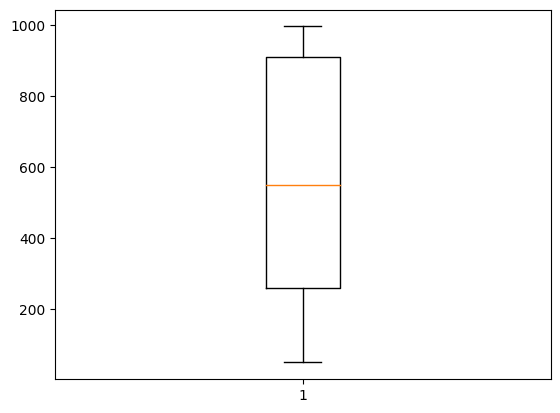

1~1000까지의 임의의 수를 수출해 상자 그림으로 나타낸 결과


In [8]:
import matplotlib.pyplot as plt;
import random

result = []

for i in range(13):
    result.append(random.randint(1, 1000))

print(sorted(result));

plt.boxplot(result);
plt.show();
print("1~1000까지의 임의의 수를 수출해 상자 그림으로 나타낸 결과")

다른 위치 값도 알고 싶다면?


In [9]:
import numpy as np
result = np.array(result);
print("1/4: " + str(np.percentile(result, 25)));
print("2/4: " + str(np.percentile(result, 50)));
print("3/4: " + str(np.percentile(result, 75)));

1/4: 259.0
2/4: 548.0
3/4: 908.0


4-1에서 1월과 8월 온도를 상자그림으로 그리기

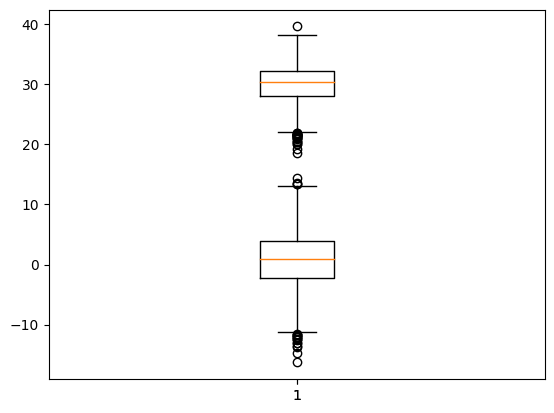

이 때, 동그란 원형 들은 이상치값(다른 수치에 비해 너무 크거나 작은 값을 자동으로 나타낸 것)을 표시한 것이다


In [11]:
import csv
import matplotlib.pyplot as plt;
file_path = (os.path.join(colab_path, "seoul.csv"))
with open (file_path, encoding = "cp949") as f:

    data = csv.reader(f);
    (next(data))
    aug = [];
    jan = []

    for row in data:
        if row[-1] !="":
            if row[0].split("-")[1] == "08":
                aug.append(float(row[-1]))
            if row[0].split("-")[1] == "01":
                jan.append(float(row[-1]));


plt.boxplot(aug);
plt.boxplot(jan);
plt.show()
print("이 때, 동그란 원형 들은 이상치값(다른 수치에 비해 너무 크거나 작은 값을 자동으로 나타낸 것)을 표시한 것이다")

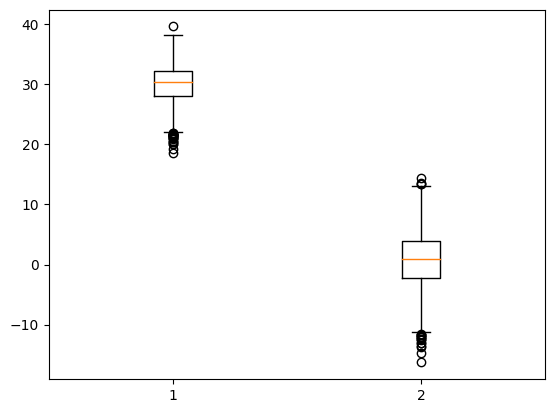

In [16]:
import csv
import matplotlib.pyplot as plt;
file_path = (os.path.join(colab_path, "seoul.csv"))
with open (file_path, encoding = "cp949") as f:

    data = csv.reader(f);
    (next(data))
    aug = [];
    jan = []

    for row in data:
        if row[-1] !="":
            if row[0].split("-")[1] == "08":
                aug.append(float(row[-1]))
            if row[0].split("-")[1] == "01":
                jan.append(float(row[-1]));


plt.boxplot([aug, jan])
plt.show()


# 실습 1.
- 1. 데이터를 월별로 분류해 저장한다.
- 2. 월별 데이터를 상자 그림으로 그린다.


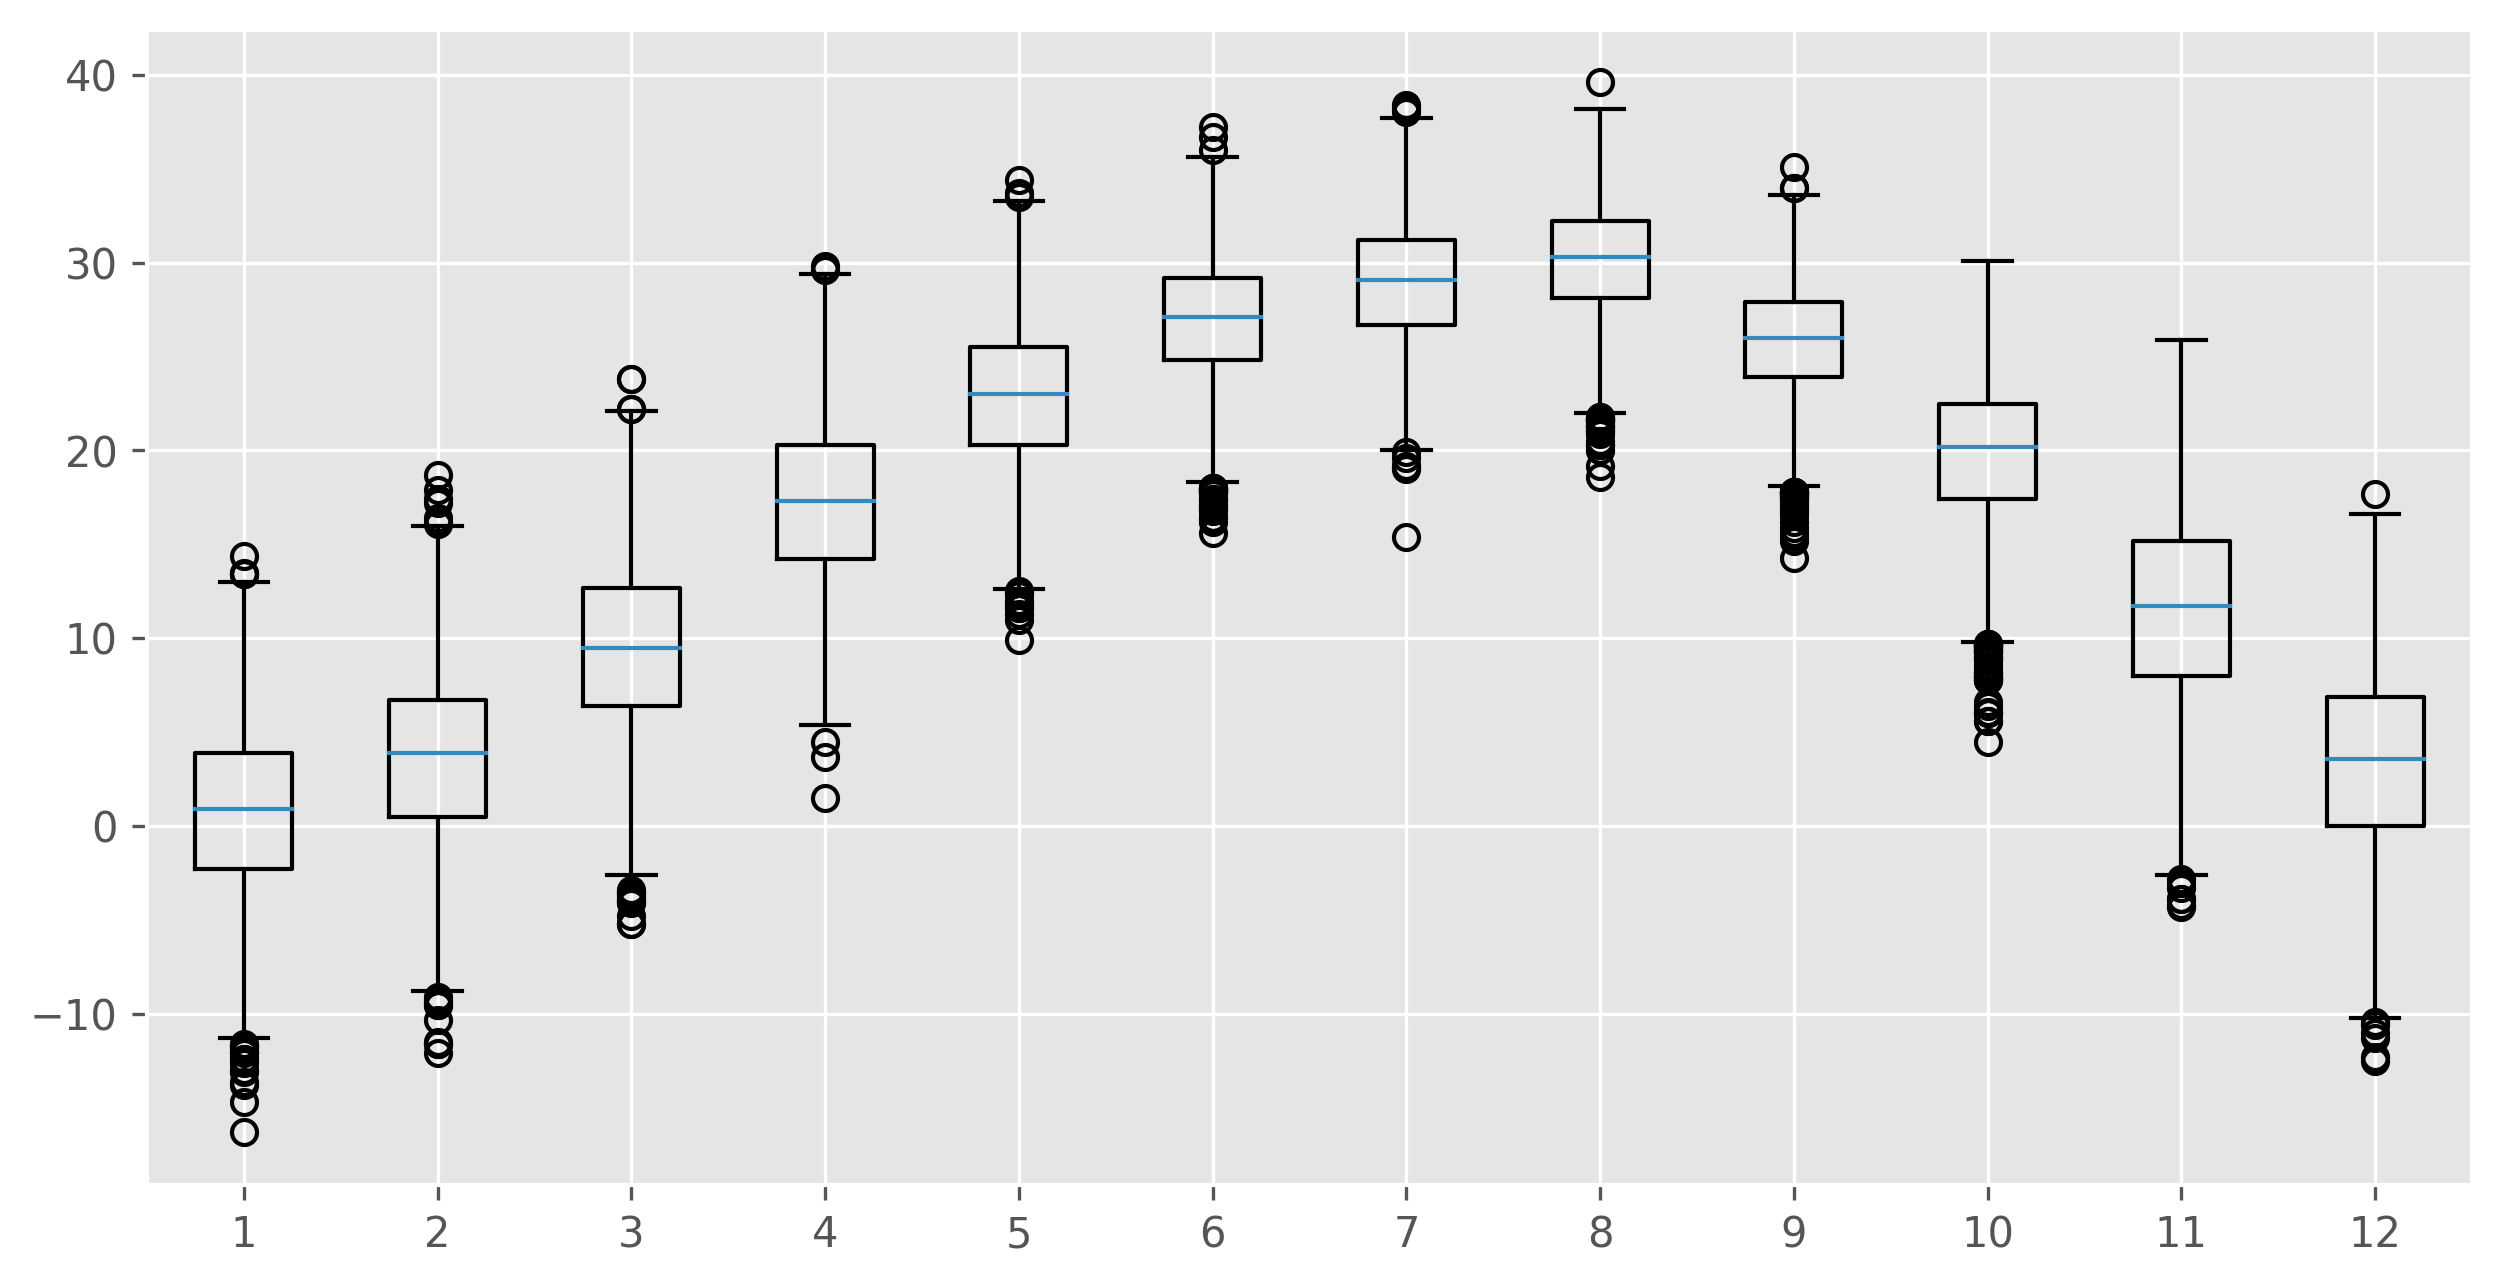

In [26]:
import csv;
import matplotlib.pyplot as plt;

file_path = (os.path.join(colab_path, "seoul.csv"))
with open (file_path, encoding = "cp949") as f:
    data = csv.reader(f);
    next(data);

    month = [[] for _ in range(12)]
    for row in data:
        if row[-1] !="":
            month[int(row[0].split("-")[1])-1].append(float(row[-1]))

plt.style.use("ggplot");
plt.figure(figsize=(10, 5), dpi=300)
plt.boxplot(month);

plt.show();


# 실습 2.
- 1. 데이터를 8월 데이터만 가져온다.
- 2. 일별 데이터를 상자 그림으로 그린다.


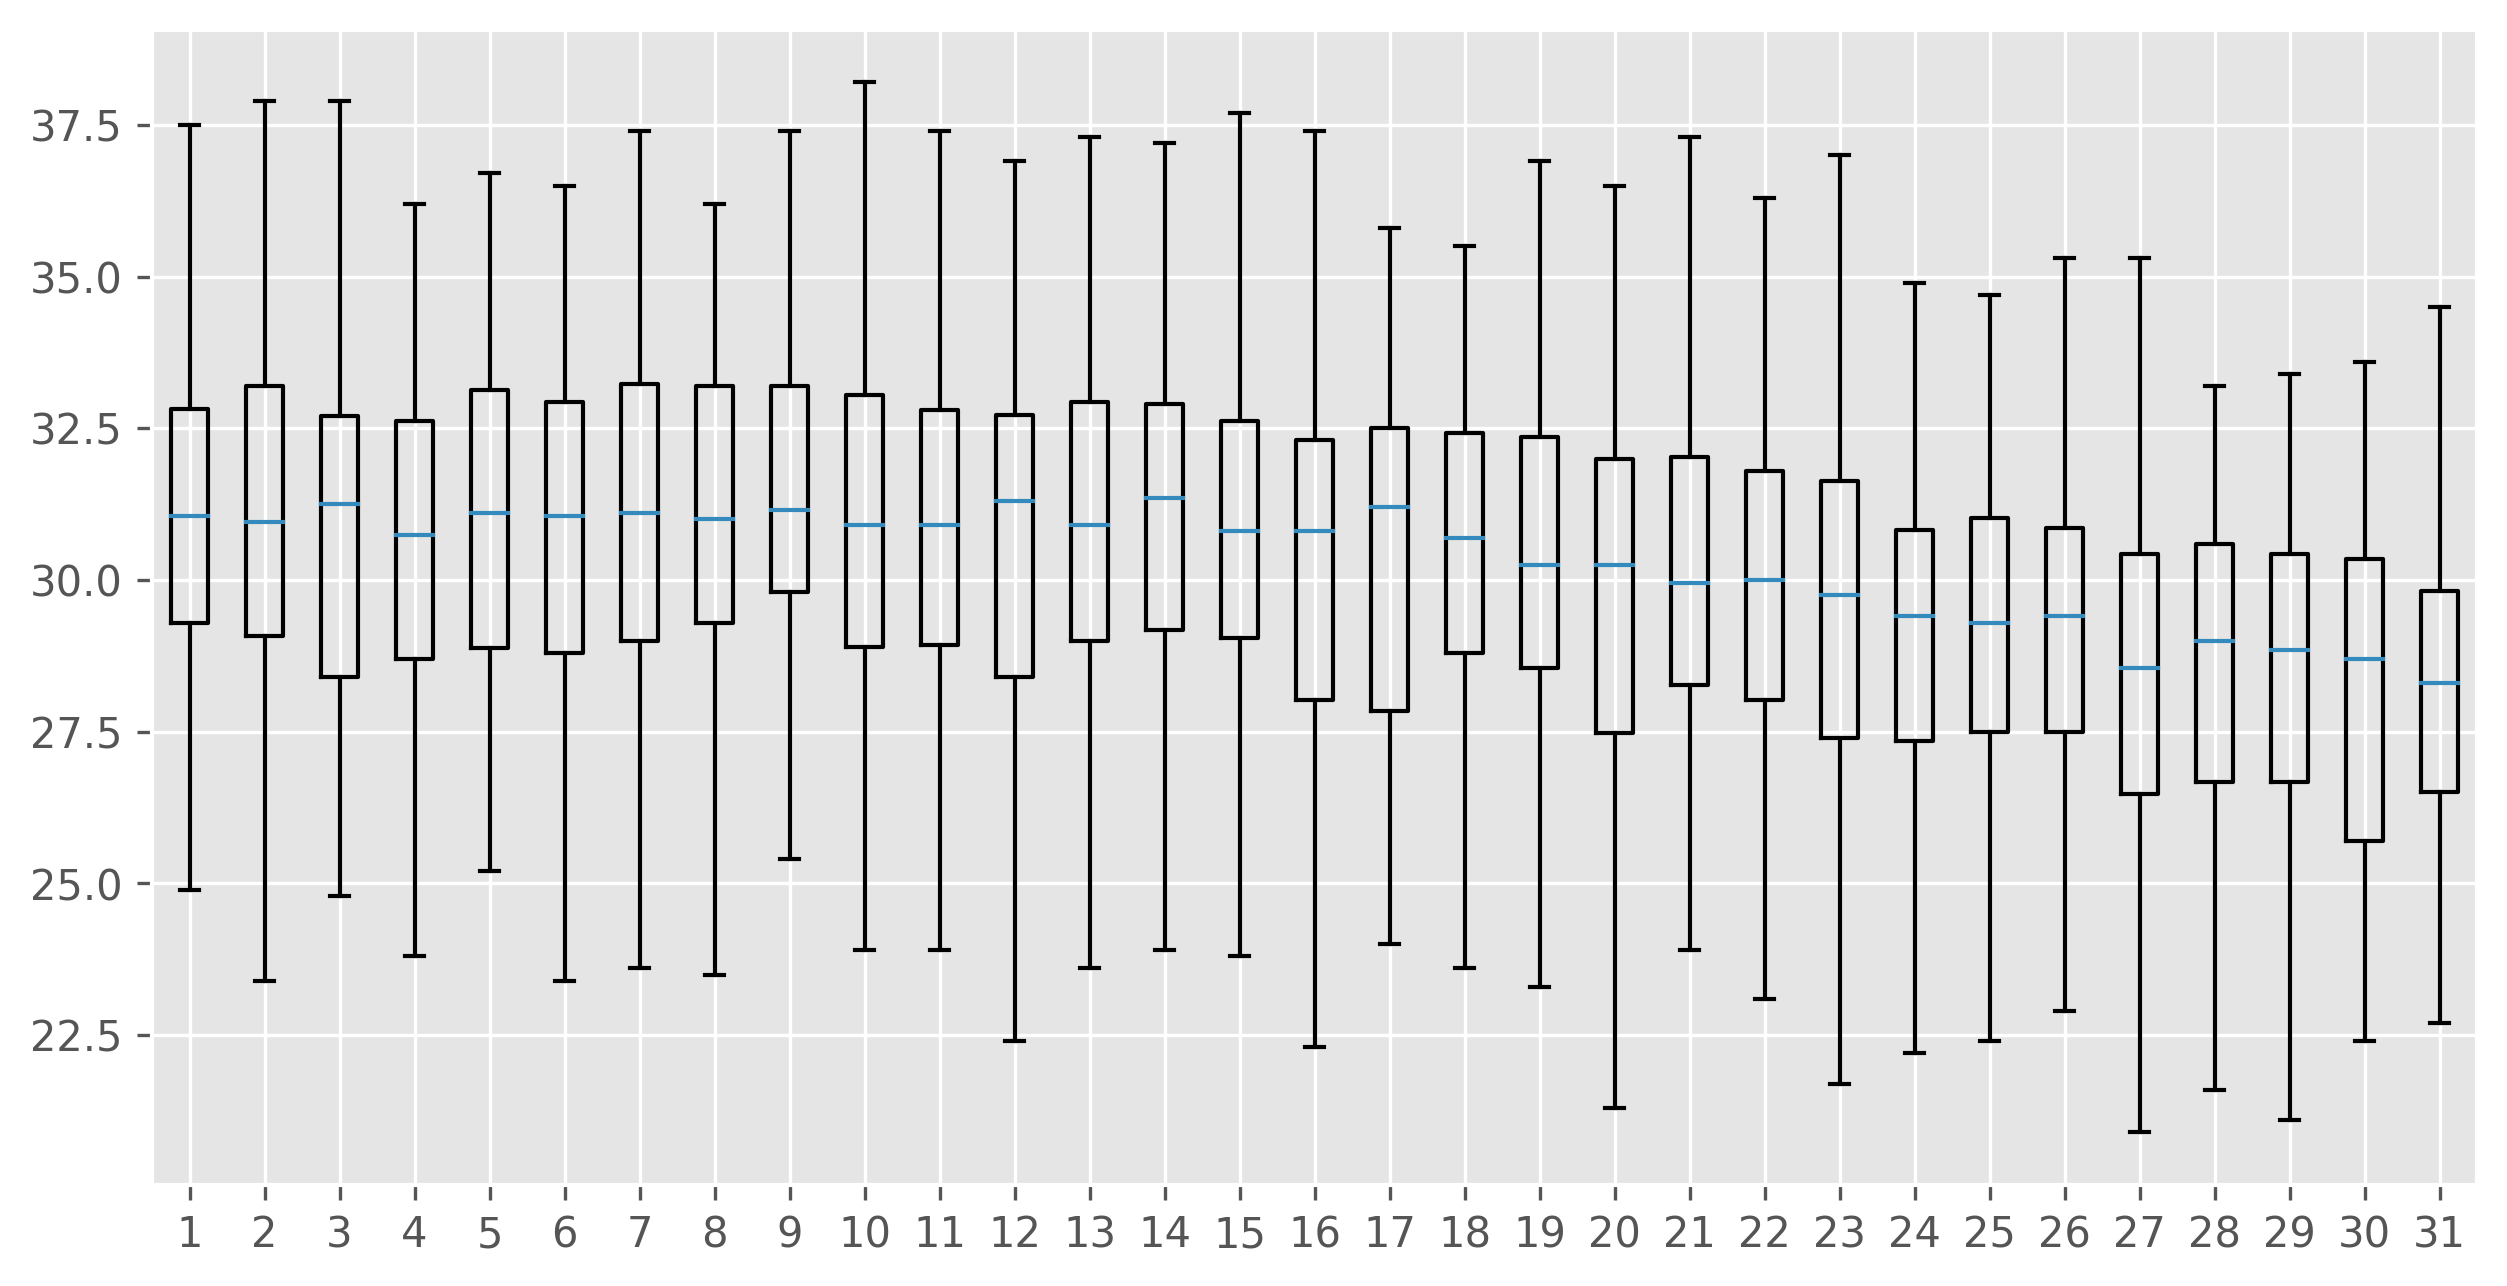

In [33]:
import csv;
import matplotlib.pyplot as plt;

file_path = (os.path.join(colab_path, "seoul.csv"))
with open (file_path, encoding = "cp949") as f:
    data = csv.reader(f);
    next(data);

    day = [[]for _ in range(31)]
    for row in data:
        if row[-1] !="" and row[0].split("-")[1] == "08":
            day[int(row[0].split("-")[2])-1].append(float(row[-1]))

plt.style.use("ggplot");
plt.figure(figsize=(10, 5), dpi=300)
plt.boxplot(day, showfliers=False);
#이 때, showfliers=False는 이상치 값이 보이지 않게 하는 것이다
plt.show();
